# Customer Segmentation for an E-commerce Platform

## Project description

Understanding and catering to customer needs is essential for any business. With the rise of e-commerce and online shopping, having a deep understanding of the customer base has become increasingly important. One effective method to gain insights into customer behavior is through clustering techniques. This project aims to identify customer segments based on their purchase behavior using three unsupervised learning algorithms: K-Means clustering, Hierarchical clustering, and PCA. Additionally, a reasonable work will be done on finding the optimal number of clusters to get better results. There will be some visualizations and comparisons of the three algorithms.
        

## Data Source

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.
link to data source: [https://archive.ics.uci.edu/ml/datasets/online+retail]

## Data Preparation


        First, we load the dataset and perform basic preprocessing to clean the data. 
        Then, we create Recency, Frequency, and Monetary (RFM) metrics for each customer.
        

In [28]:

import pandas as pd
import datetime as dt

# loading the dataset
data = pd.read_excel('./Online_Retail.xlsx')



In [29]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### Data preprocessing

#### Missing values

In [31]:
#exploring the number of missing values per feature in percentage
print('Number of missing values: ', data.isnull().values.sum())
print('missing values per feature: ') 
data.isnull().sum()

Number of missing values:  136534
missing values per feature: 


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [32]:
# removing all of the rows with missing values
data.dropna(inplace=True)
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [77]:
# after inspection 9K rows that have a negative value for quantity, so let's keep the positive ones
data = data[data['Quantity'] > 0]
data = data[data['UnitPrice'] > 0]

In [78]:
#finding the count of values that have a len less than 5 (which is a standard stockcode length)

code_less_5_filter = data['StockCode'].str.len() < 5
code_less_5 = data[code_less_5_filter]
count_stockcode_less_5 = code_less_5.shape[0]

print("Number of values with length less than 5 in StockCode: {}".format(count_stockcode_less_5))
code_less_5.value_counts('StockCode')

Number of values with length less than 5 in StockCode: 1535


StockCode
POST    1099
M        284
C2       133
DOT       16
PADS       3
Name: count, dtype: int64

In [79]:
# finding total price
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# creating RFM Metrics
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
now = dt.datetime(2011, 12, 10)
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (now - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
}).reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head(10)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40
5,12352.0,36,85,2506.04
6,12353.0,204,4,89.00
7,12354.0,232,58,1079.40
8,12355.0,214,13,459.40
9,12356.0,22,59,2811.43


#### Distribution of Recency, Frequency, and Monetary values

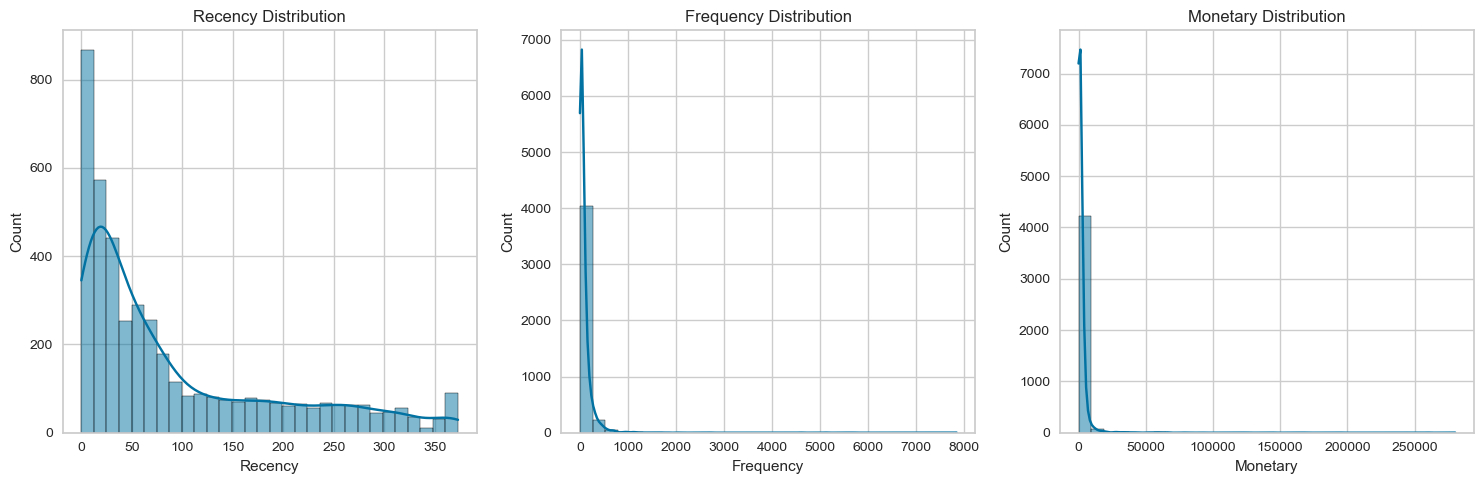

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# distribution plots for Recency, Frequency, and Monetary
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], kde=True, bins=30)
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], kde=True, bins=30)
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], kde=True, bins=30)
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()


#### Correlation Heatmap

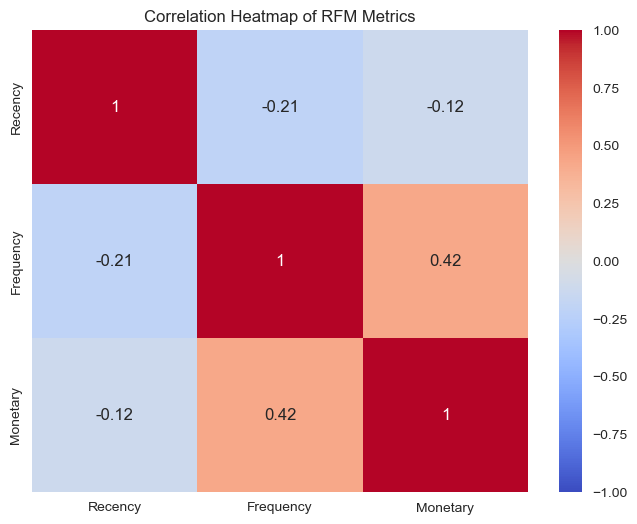

In [81]:
# correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rfm[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of RFM Metrics')
plt.show()


#### Pairplot of RFM Metrics

/Users/sammieomranian/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


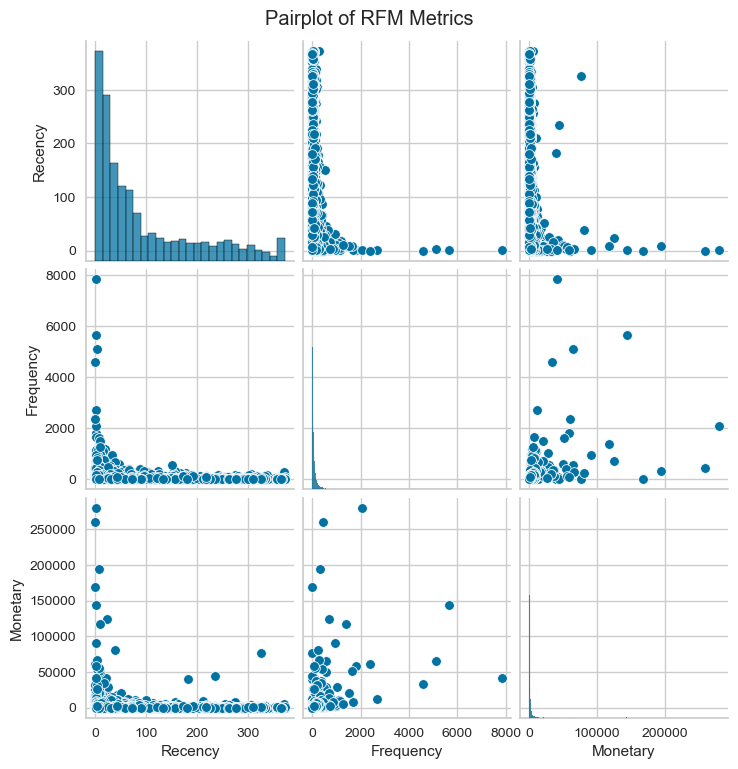

In [82]:
# pairplot of RFM metrics
sns.pairplot(rfm[['Recency', 'Frequency', 'Monetary']])
plt.suptitle('Pairplot of RFM Metrics', y=1.02)
plt.show()


## Standardize the Data


Standardizing the RFM metrics using `StandardScaler` to ensure each metric contributes equally to the clustering process.
        

In [83]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])
rfm_scaled[:5]


array([[ 2.32938811, -0.3965777 ,  8.35866818],
       [-0.90058811,  0.39464896,  0.25096626],
       [-0.17059349, -0.26543516, -0.02859601],
       [-0.74058929, -0.08183561, -0.0330118 ],
       [ 2.17938921, -0.32663501, -0.19134727]])

## K-Means Clustering


Applying the K-Means algorithm to the standardized data to segment customers into distinct clusters. 
Using the elbow method to determine the optimal number of clusters.
        

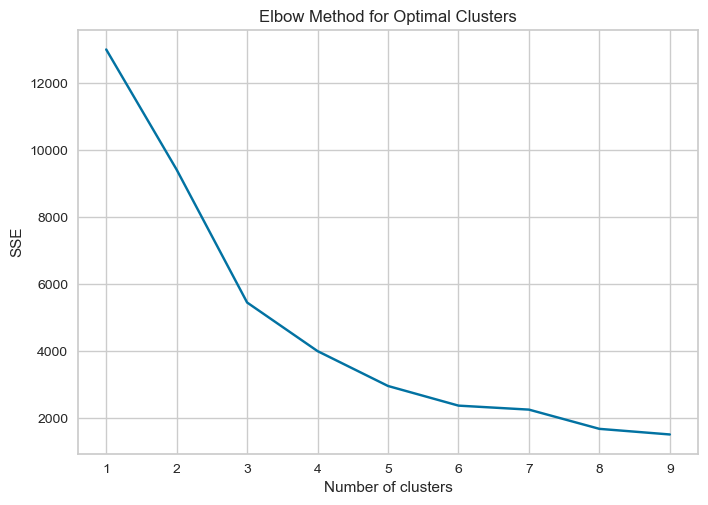

In [84]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method to find the optimal # of clusters
sum_sqrt = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=0)
    kmeans.fit(rfm_scaled)
    sum_sqrt[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sum_sqrt.keys()), list(sum_sqrt.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal Clusters")
plt.show()


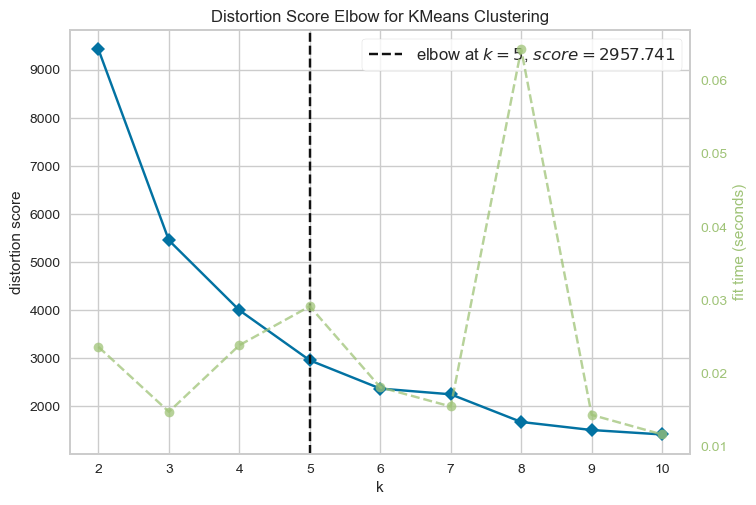

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [85]:
#visualziing elbow using KElbowVisualzier
elbow_method = KElbowVisualizer(kmeans, k = 10)
elbow_method.fit(rfm_scaled)
elbow_method.show()

In [98]:

# K-Means with the optimal number of clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
rfm['KMeans_Cluster'] = kmeans.fit_predict(rfm_scaled)
rfm.head()

rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

/Users/sammieomranian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sammieomranian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Hierarchical Clustering


        Apply hierarchical clustering and evaluate the results using the silhouette score.
        

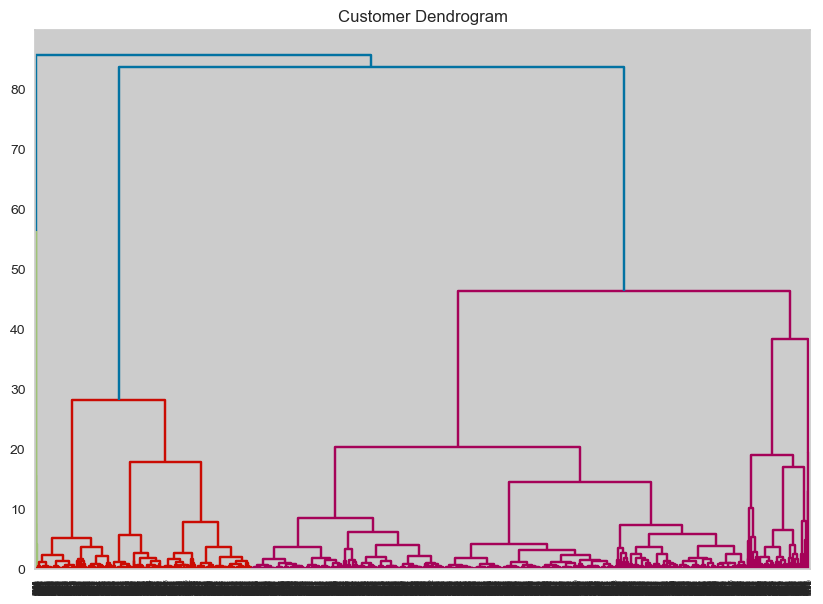

,CustomerID,Recency,Frequency,Monetary,KMeans_Cluster,Hierarchical_Cluster
0,12346.0,325,1,77183.60,1,4
1,12347.0,2,182,4310.00,0,4
2,12348.0,75,31,1797.24,0,4
3,12349.0,18,73,1757.55,0,4
4,12350.0,310,17,334.40,1,3


In [87]:

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Hierarchical Clustering
Z = linkage(rfm_scaled, 'ward')
plt.figure(figsize=(10, 7))
plt.title("Customer Dendrogram")
dendrogram(Z)
plt.show()

# Assigning clusters based on dendrogram
rfm['Hierarchical_Cluster'] = fcluster(Z, optimal_clusters, criterion='maxclust')
rfm.head()


## Principal Component Analysis (PCA)


        Apply PCA to reduce the dimensionality of the data and analyze the explained variance ratio.
        

In [88]:

from sklearn.decomposition import PCA

# PCA for Dimensionality Reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(rfm_scaled)
rfm['PCA1'] = pca_components[:, 0]
rfm['PCA2'] = pca_components[:, 1]
rfm.head()


,CustomerID,Recency,Frequency,Monetary,KMeans_Cluster,Hierarchical_Cluster,PCA1,PCA2
0,12346.0,325,1,77183.60,1,4,4.037431,5.382901
1,12347.0,2,182,4310.00,0,4,0.785605,-0.641935
2,12348.0,75,31,1797.24,0,4,-0.124805,-0.210452
3,12349.0,18,73,1757.55,0,4,0.225994,-0.693610
4,12350.0,310,17,334.40,1,3,-1.222848,1.828106


## Visualization and Comparison the Product Category Clusters


        Visualize the clusters for K-Means and Hierarchical clustering in the PCA-reduced space. 
        Compare the silhouette scores of K-Means and Hierarchical clustering. 
        Create a comparison table and bar plot to visualize the results.
        

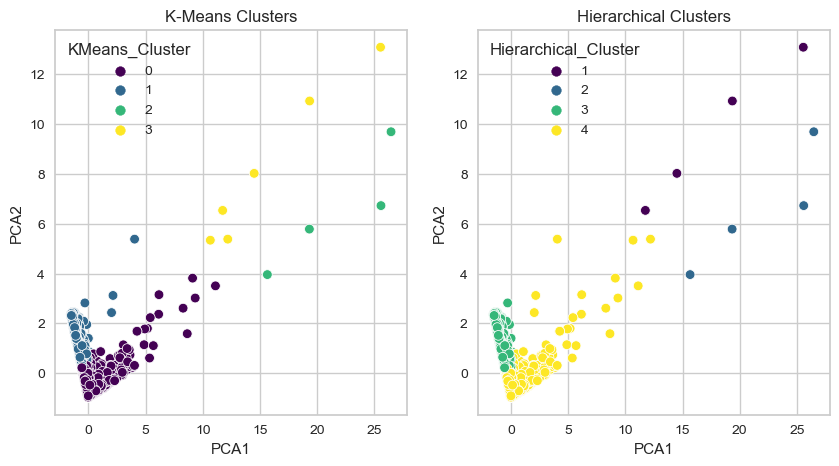

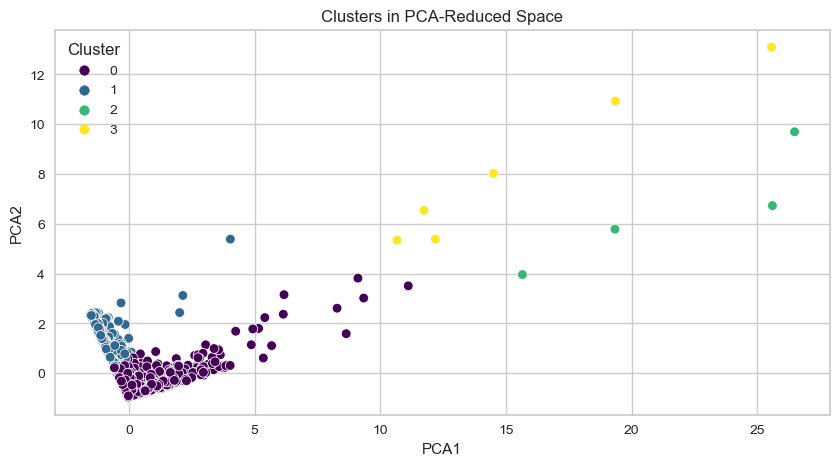

In [99]:

import seaborn as sns

# visualization of Clusters in PCA-Reduced Space
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=rfm, palette='viridis')
plt.title("K-Means Clusters")

plt.subplot(1, 2, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='Hierarchical_Cluster', data=rfm, palette='viridis')
plt.title("Hierarchical Clusters")

plt.show()

# reducing dimensions using PCA for 2-D visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)
rfm['PCA1'] = rfm_pca[:, 0]
rfm['PCA2'] = rfm_pca[:, 1]


# Visualization of Clusters in PCA-Reduced Space
plt.figure(figsize=(10, 5))

# ensure the 'Cluster' column exists
assert 'Cluster' in rfm.columns, "The 'Cluster' column is missing from the DataFrame"

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=rfm, palette='viridis')
plt.title("Clusters in PCA-Reduced Space")
plt.show()


K-Means Silhouette Score: 0.5999220684921328
Hierarchical Clustering Silhouette Score: 0.5804470065902994


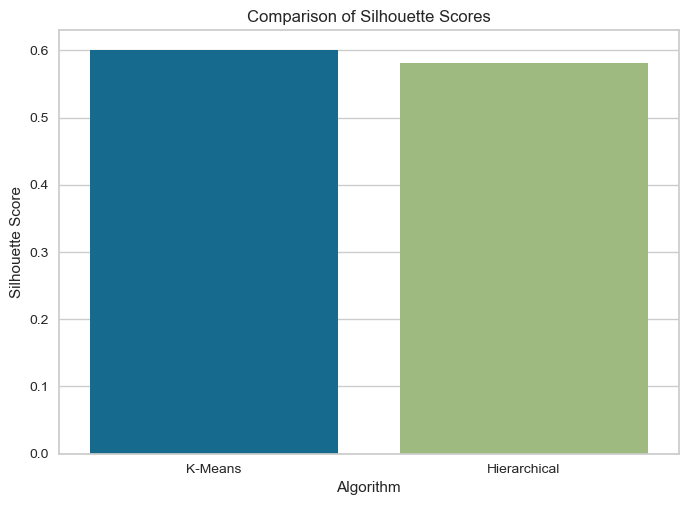

,Algorithm,Silhouette Score
0,K-Means,0.599922
1,Hierarchical,0.580447


In [100]:

from sklearn.metrics import silhouette_score

# comparison of Silhouette Scores
kmeans_silhouette = silhouette_score(rfm_scaled, rfm['KMeans_Cluster'])
hierarchical_silhouette = silhouette_score(rfm_scaled, rfm['Hierarchical_Cluster'])

print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette}")

# comparison Table and Bar Plot
comparison = pd.DataFrame({
    'Algorithm': ['K-Means', 'Hierarchical'],
    'Silhouette Score': [kmeans_silhouette, hierarchical_silhouette]
})

plt.figure()
sns.barplot(x='Algorithm', y='Silhouette Score', data=comparison)
plt.title('Comparison of Silhouette Scores')
plt.show()

comparison
